In [613]:
%matplotlib inline
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [614]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 48)

In [615]:
sns.set(style="darkgrid") # set seaborn style

In [616]:
#Load dataset
df_train = pd.read_csv("./input/df_train.csv", index_col=0)
df_test = pd.read_csv("./input/df_test.csv", index_col=0)

#Insurance dataset
copy_train = df_train.copy()
copy_test = df_test.copy()

In [617]:
df_train.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [618]:
print(f'Train data shape: {df_train.shape}  |  Test data shape: {df_test.shape}')

Train data shape: (8763, 48)  |  Test data shape: (2920, 47)


In [619]:
#plotting distributions of all the variables in train
# df_train.hist(bins=50, figsize=(40,30), color = 'tab:blue')
# plt.show()

<AxesSubplot:xlabel='Valencia_pressure'>

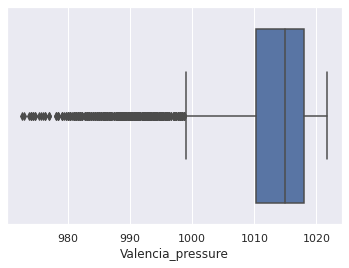

In [620]:
#Boxplot
sns.boxplot(df_train.Valencia_pressure)

<AxesSubplot:>

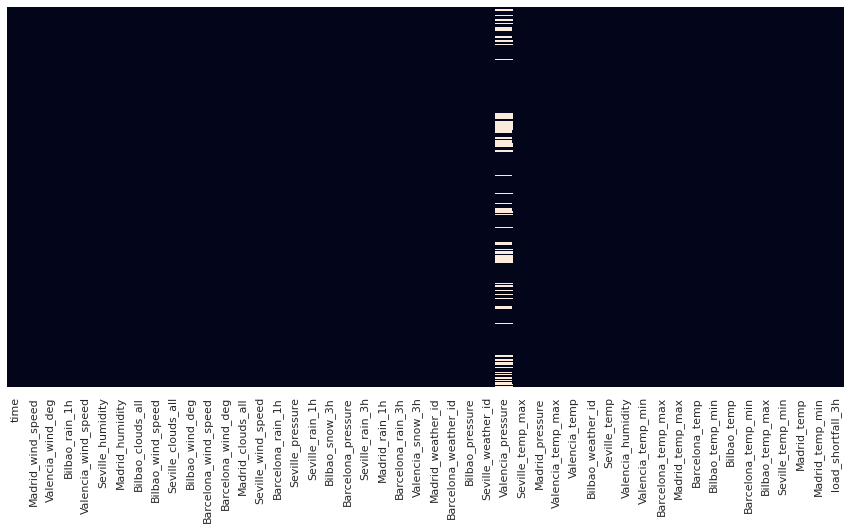

In [621]:
#Missing Values

# Bar chart showing the number of missing values in each column
plt.figure(figsize=(15,7))
sns.heatmap(df_train.isna() , yticklabels=False , cbar=False)

In [622]:
missing_values_train = df_train.Valencia_pressure.isna().sum()
print(f'Train data Missing Values: {missing_values_train}  |   Percentage: {round(( missing_values_train/ df_train.Valencia_pressure.shape[0]) *100, 2)}%')

Train data Missing Values: 2068  |   Percentage: 23.6%


<AxesSubplot:xlabel='Valencia_pressure'>

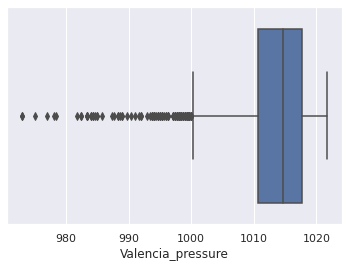

In [623]:
#Boxplot
sns.boxplot(df_test.Valencia_pressure)

<AxesSubplot:>

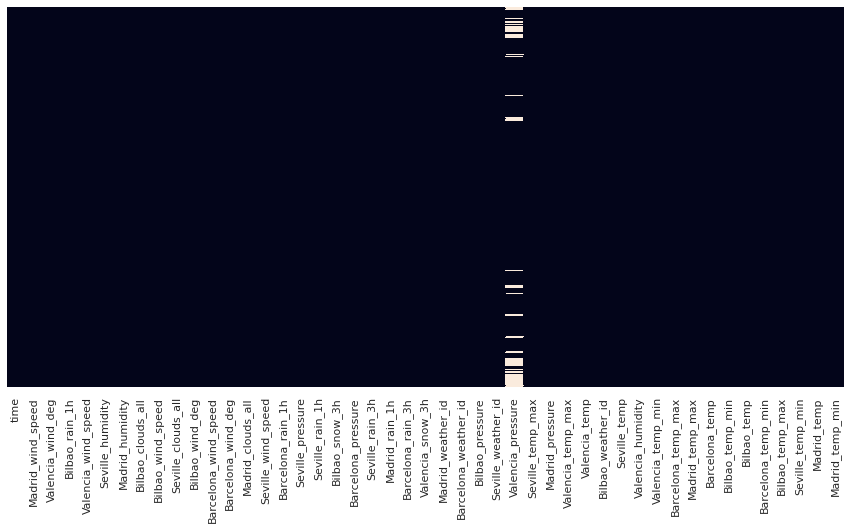

In [624]:
# Bar chart showing the number of missing values in each column
plt.figure(figsize=(15,7))
sns.heatmap(df_test.isna() , yticklabels=False , cbar=False)

In [625]:
missing_values_test = df_test.Valencia_pressure.isna().sum()
print(f'Train data Missing Values: {missing_values_test}  |   Percentage: {round(( missing_values_test / df_train.Valencia_pressure.shape[0]) *100, 2)}%')

Train data Missing Values: 454  |   Percentage: 5.18%


In [626]:
print(f'Mean: {df_train.Valencia_pressure.mean()}')
print(f'Median: {df_train.Valencia_pressure.median()}')
print(f'Mode: {df_train.Valencia_pressure.mode()}')

Mean: 1012.0514065222828
Median: 1015.0
Mode: 0    1018.0
dtype: float64


In [627]:
#Impute missing values in Valencia_pressure with mean
df_train.Valencia_pressure.fillna(df_train.Valencia_pressure.mode()[0], inplace=True)
df_test.Valencia_pressure.fillna(df_test.Valencia_pressure.mode()[0], inplace=True)

In [628]:
#Categorical Values
df_train.dtypes.value_counts()

float64    45
object      3
dtype: int64

In [629]:
df_train.dtypes

time                     object
Madrid_wind_speed       float64
Valencia_wind_deg        object
Bilbao_rain_1h          float64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Barcelona_rain_1h       float64
Seville_pressure         object
Seville_rain_1h         float64
Bilbao_snow_3h          float64
Barcelona_pressure      float64
Seville_rain_3h         float64
Madrid_rain_1h          float64
Barcelona_rain_3h       float64
Valencia_snow_3h        float64
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_pressure         float64
Seville_weather_id      float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_pressure         float64
Valencia

In [630]:
print(f'Sum of unique object: {df_train.Valencia_wind_deg.value_counts().count()}')
df_train.Valencia_wind_deg.unique()

Sum of unique object: 10


array(['level_5', 'level_10', 'level_9', 'level_8', 'level_7', 'level_6',
       'level_4', 'level_3', 'level_1', 'level_2'], dtype=object)

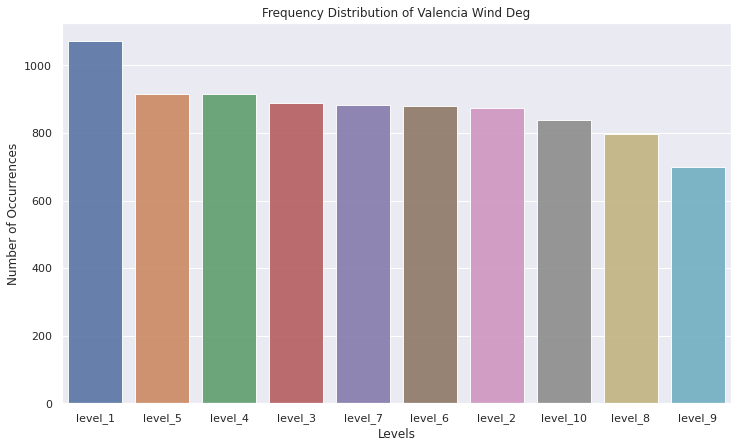

In [631]:
valencia_wind_count = df_train['Valencia_wind_deg'].value_counts()
plt.figure(figsize=(12,7))
sns.barplot(valencia_wind_count.index, valencia_wind_count.values, alpha=0.9)
plt.title('Frequency Distribution of Valencia Wind Deg')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Levels', fontsize=12)
plt.show()

In [632]:
print(f'Sum of unique object: {df_train.Seville_pressure.value_counts().count()}')
df_train.Seville_pressure.unique()

Sum of unique object: 25


array(['sp25', 'sp23', 'sp24', 'sp21', 'sp16', 'sp9', 'sp15', 'sp19',
       'sp22', 'sp11', 'sp8', 'sp4', 'sp6', 'sp13', 'sp17', 'sp20',
       'sp18', 'sp14', 'sp12', 'sp5', 'sp10', 'sp7', 'sp3', 'sp2', 'sp1'],
      dtype=object)

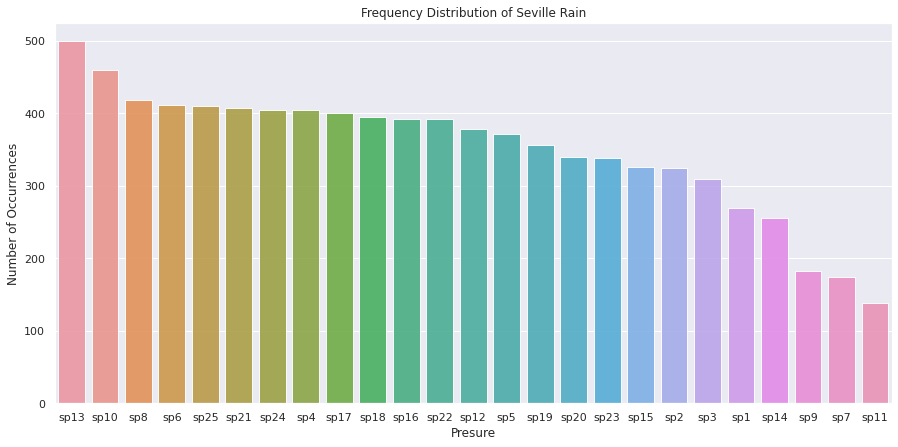

In [633]:
seville_presure_count = df_train['Seville_pressure'].value_counts()
plt.figure(figsize=(15,7))
sns.barplot(seville_presure_count.index, seville_presure_count.values, alpha=0.9)
plt.title('Frequency Distribution of Seville Rain')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Presure', fontsize=12)
plt.show()

In [634]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder , StandardScaler
from sklearn.compose import ColumnTransformer , make_column_transformer
from sklearn.model_selection import train_test_split , cross_validate

In [635]:
#Impute Categirical features using OrdinalEncoder()
enc = OrdinalEncoder()

In [636]:
df_train.Valencia_wind_deg = enc.fit_transform(df_train[['Valencia_wind_deg']])
df_train.Seville_pressure = enc.fit_transform(df_train[['Seville_pressure']])

In [637]:
df_test.Valencia_wind_deg = enc.fit_transform(df_test[['Valencia_wind_deg']])
df_test.Seville_pressure = enc.fit_transform(df_test[['Seville_pressure']])

In [638]:
df_test.dtypes.value_counts()

float64    44
int64       2
object      1
dtype: int64

In [639]:
df_train.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,5.0,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,17.0,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,1.0,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,17.0,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,9.0,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,17.0,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,8.0,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,17.0,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,7.0,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,17.0,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,1018.000000,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [640]:
features = ['Madrid_wind_speed', 'Valencia_wind_deg', 'Valencia_wind_speed',
       'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all',
       'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg',
       'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all',
       'Seville_wind_speed', 'Seville_pressure', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Barcelona_rain_3h',
       'Valencia_snow_3h', 'Madrid_weather_id', 'Barcelona_weather_id',
       'Bilbao_pressure', 'Seville_weather_id', 'Valencia_pressure',
       'Seville_temp_max', 'Madrid_pressure', 'Valencia_temp_max',
       'Valencia_temp', 'Bilbao_weather_id', 'Seville_temp',
       'Valencia_humidity', 'Valencia_temp_min', 'Barcelona_temp_max',
       'Madrid_temp_max', 'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Seville_temp_min',
       'Madrid_temp', 'Madrid_temp_min', 'load_shortfall_3h', 'Bilbao_rain_1h',
       'Barcelona_rain_1h', 'Seville_rain_1h', 'Madrid_rain_1h']

In [641]:
#Drop Column
#df_train.drop(['time'] , axis=1 , inplace=True)
#df_test.drop(['time'] , axis=1 , inplace=True)

In [642]:
df_train.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,5.0,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,17.0,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,1.0,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,17.0,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,9.0,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,17.0,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,8.0,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,17.0,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,7.0,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,17.0,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,1018.000000,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


<AxesSubplot:>

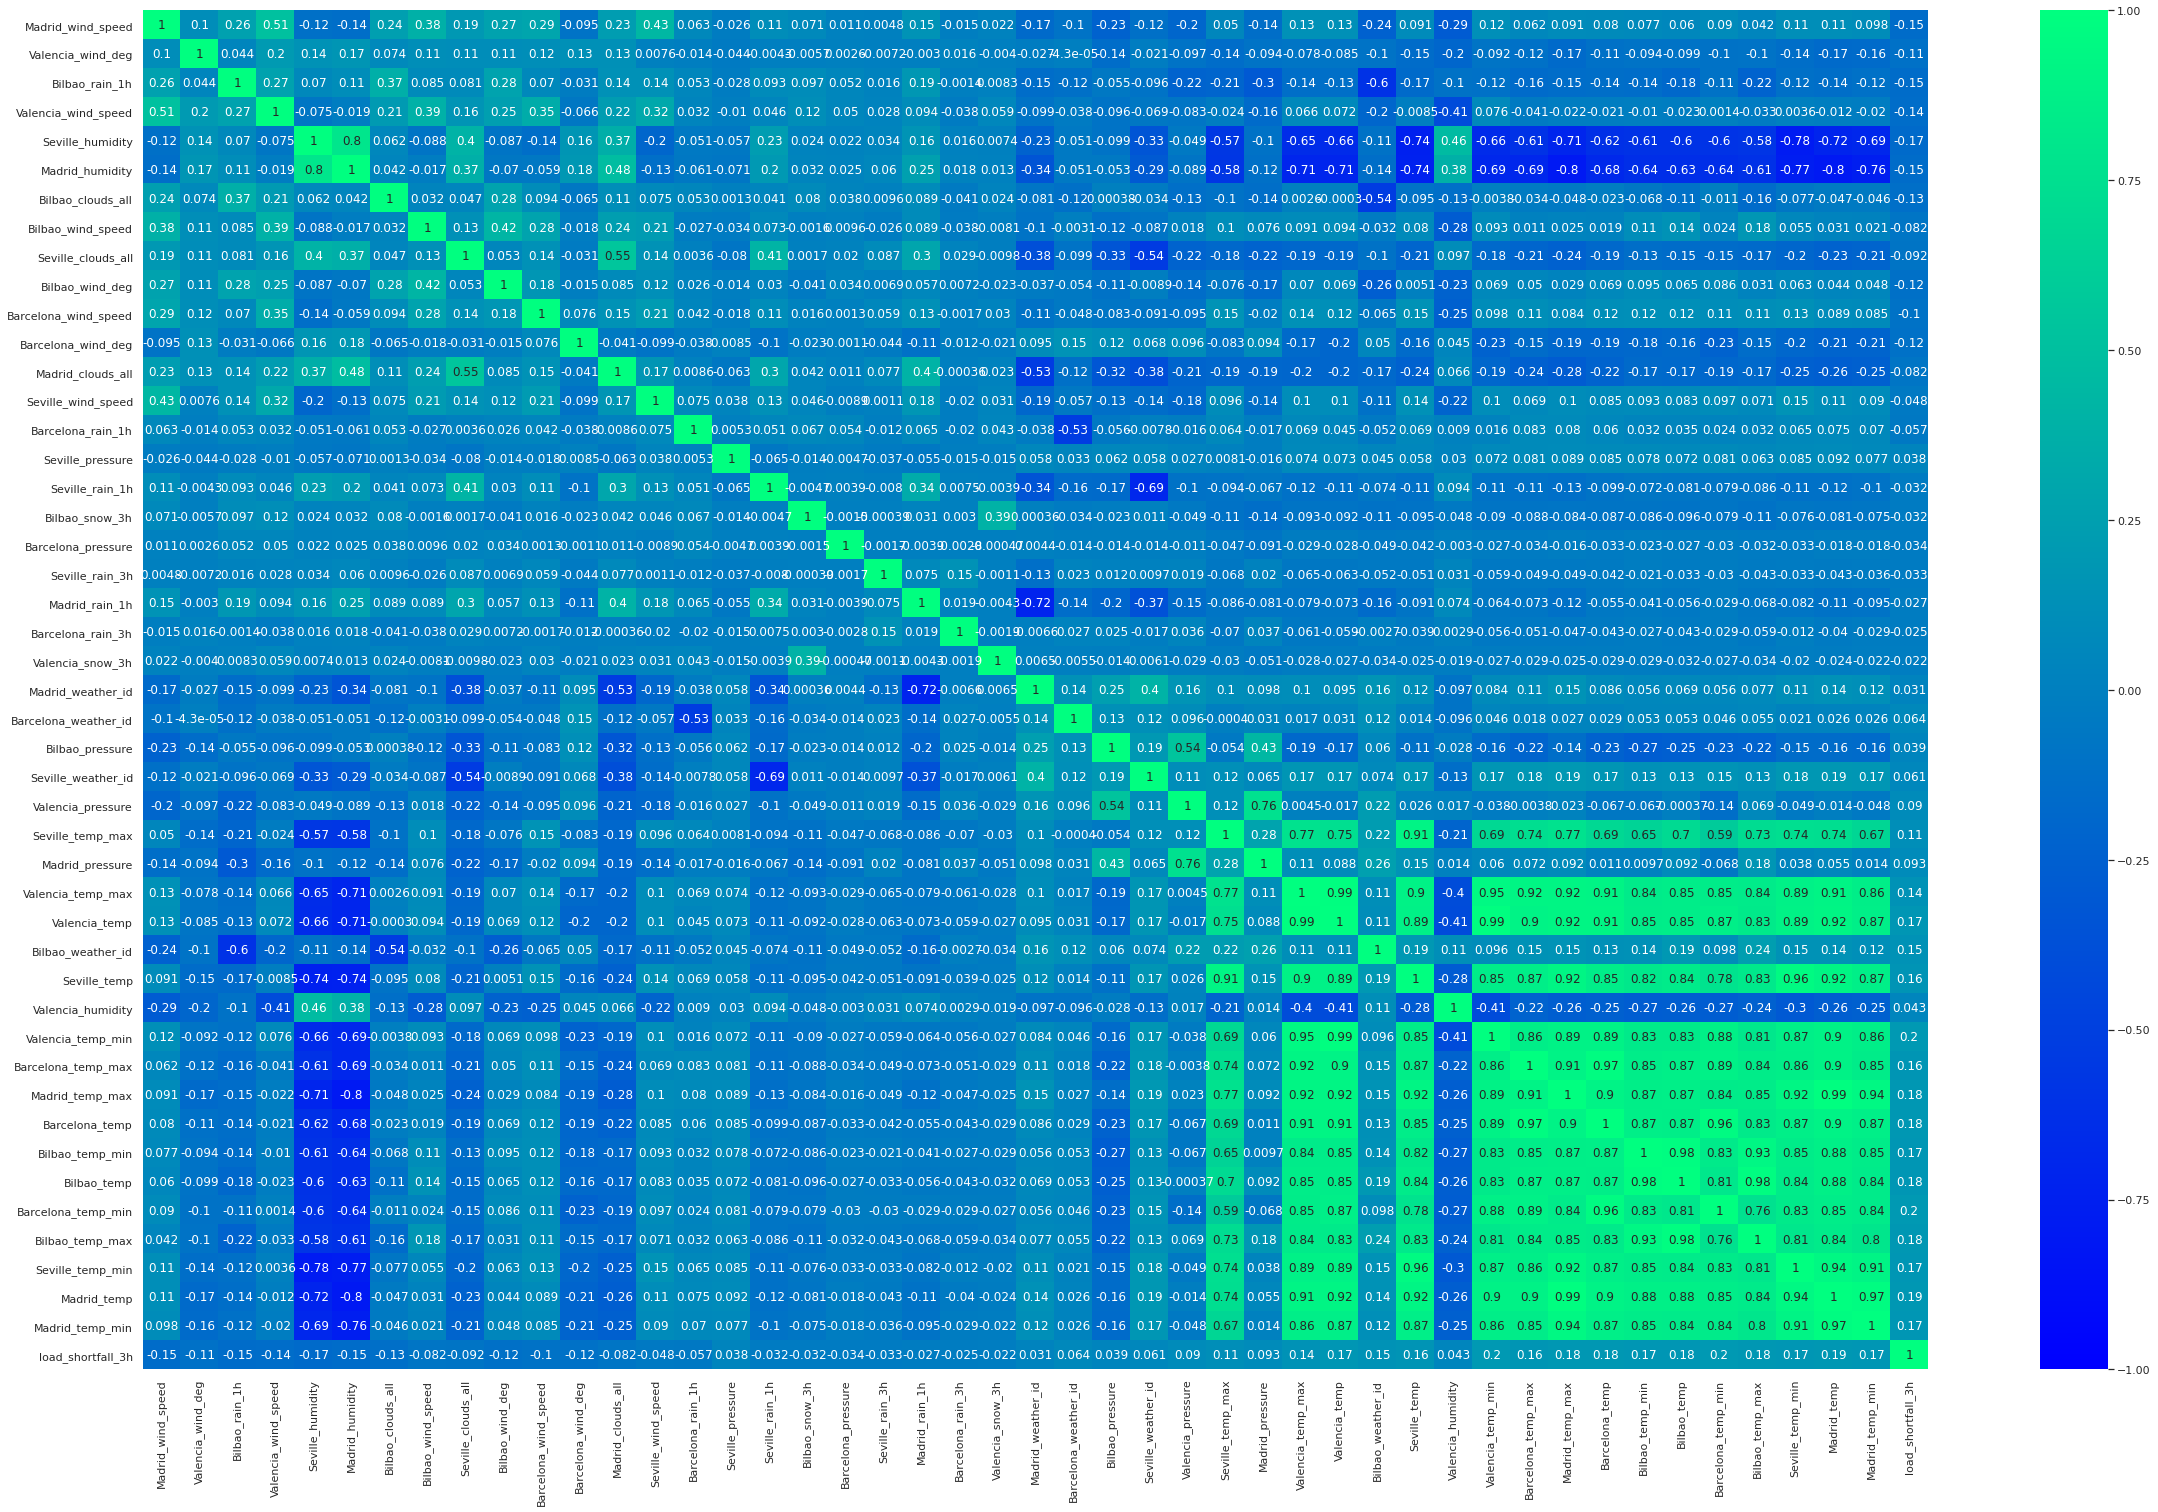

In [643]:
#Plotting correlation heat map for predictor variable in train 
# train_features = df_train.drop(['load_shortfall_3h'], axis =1)
train_corr = df_train.corr()

# Plot the matrix
plt.figure(figsize=(40,25))
sns.heatmap(train_corr,annot=True, vmin=-1, vmax=1, cmap='winter')

In [644]:
#Drop time column
df_train.drop(['time'] , axis=1 , inplace=True)
df_test_copy = df_test.copy
df_test.drop(['time'] , axis=1 , inplace=True)

In [645]:
# columns = df_train.drop(['load_shortfall_3h'] , axis=1).columns

In [646]:
#Scale the dataset
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_train.drop(['load_shortfall_3h'] , axis=1).values)
scaled_features_test = scaler.fit_transform(df_test.values)

In [647]:
scaled_features_df = pd.DataFrame(scaled_features, index=df_train.index, columns=columns)
scaled_features_df_test = pd.DataFrame(scaled_features_test, index=df_test.index, columns=df_test.columns)

In [648]:
 scaled_features_df.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,-0.950708,0.248717,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,1.932284,-1.660205,-0.694188,0.542975,-0.203099,0.735519,-0.224278,-0.057269,-0.024277,-0.066278,-0.247776,-0.110037,-0.017312,0.342424,0.385993,1.718219,0.352274,-1.242351,-2.616796,-1.756232,-2.835227,-2.890888,0.649842,-2.490266,0.540928,-2.892663,-1.394813,-2.420380,-1.354598,-2.338357,-2.505658,-1.218309,-2.621665,-2.125118,-2.405393,-2.309892
1,-1.130863,-1.157189,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,0.630270,-0.578686,-0.694188,0.542975,-0.203099,0.735519,-0.224278,-0.057269,-0.024206,-0.066278,-0.247776,-0.110037,-0.017312,0.342424,0.385993,1.784583,0.352274,-1.050427,-2.539014,-1.696165,-2.591966,-2.633926,0.649842,-2.403108,0.298645,-2.626219,-1.456868,-2.374370,-1.423738,-2.183645,-2.353511,-1.292271,-2.475661,-2.040702,-2.357388,-2.261154
2,-0.770554,1.654623,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,-0.485743,1.520733,-0.694188,0.144442,-0.203099,0.735519,-0.224278,-0.057269,-0.024158,-0.066278,-0.247776,-0.110037,-0.017312,0.342424,0.385993,1.817765,0.352274,-0.935272,-2.105564,-1.636097,-1.761812,-1.757012,0.649842,-1.917409,0.021750,-1.716949,-1.316350,-1.726058,-1.267176,-1.489980,-1.671342,-1.124792,-1.821036,-1.570279,-1.680968,-1.574407
3,-0.770554,1.303146,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,-0.299741,0.925711,-0.694188,0.941509,-0.203099,0.735519,-0.224278,-0.057269,-0.024229,-0.066278,-0.247776,-0.110037,-0.017312,0.342424,0.385993,1.817765,0.352274,-0.513039,-1.361703,-0.705052,-0.850953,-0.794849,0.649842,-1.083879,-0.583957,-0.719283,-1.061929,-0.783992,-0.983703,-0.579082,-0.775541,-0.821553,-0.961406,-0.762967,-0.698057,-0.576488
4,-0.770554,0.951670,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,0.816272,0.779762,-0.694188,0.343708,-0.203099,0.735519,-0.224278,-0.057269,-0.024372,-0.066278,-0.247776,-0.110037,-0.017312,0.342424,0.385993,1.751401,0.352274,0.523351,-1.348214,1.127003,-1.100044,-1.057970,0.649842,-1.068764,-0.358980,-0.992113,-0.954814,-0.908771,-0.864356,-0.412497,-0.611717,-0.693885,-0.804197,-0.748327,-0.828246,-0.708665


In [649]:
# #Add load_short_fall_3h as last_columns on training data
scaled_features_df['load_shortfall_3h'] = copy_train.load_shortfall_3h.values

# #Add load_short_fall_3h as last_columns on training data
# scaled_features_df.insert(0, 'time', copy_train.time.values)
# scaled_features_df_test.insert(0, 'time', copy_test.time.values)

In [650]:
# train_corr = scaled_features_df.corr()
# # Plot the matrix
# plt.figure(figsize=(40,25))
# sns.heatmap(train_corr,annot=True, vmin=-1, vmax=1, cmap='winter')

In [651]:
# Convert the object time to pandas datetime dtype
# from datetime import datetime
# import time
# # scaled_features_df.time = pd.to_datetime(scaled_features_df.time , format = "%m-%d-%Y %H:%M:%S", errors='coerce')
# # time.mktime(scaled_features_df.time.timetuple())
# scaled_features_df.time = scaled_features_df.time.astype('datetime64').astype(int).astype(float)

# scaled_features_df_test.time = pd.to_datetime(scaled_features_df_test.time , format = "%m-%d-%Y %H:%M:%S", errors='coerce')
# scaled_features_df_test.time =scaled_features_df_test.time.apply(lambda x: time.mktime(x.timetuple()))

In [652]:
# scaled_features_df_test.time = scaled_features_df_test.time.astype('datetime64').astype(int).astype(float)


In [653]:
scaled_features_df.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,-0.950708,0.248717,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,1.932284,-1.660205,-0.694188,0.542975,-0.203099,0.735519,-0.224278,-0.057269,-0.024277,-0.066278,-0.247776,-0.110037,-0.017312,0.342424,0.385993,1.718219,0.352274,-1.242351,-2.616796,-1.756232,-2.835227,-2.890888,0.649842,-2.490266,0.540928,-2.892663,-1.394813,-2.420380,-1.354598,-2.338357,-2.505658,-1.218309,-2.621665,-2.125118,-2.405393,-2.309892,6715.666667
1,-1.130863,-1.157189,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,0.630270,-0.578686,-0.694188,0.542975,-0.203099,0.735519,-0.224278,-0.057269,-0.024206,-0.066278,-0.247776,-0.110037,-0.017312,0.342424,0.385993,1.784583,0.352274,-1.050427,-2.539014,-1.696165,-2.591966,-2.633926,0.649842,-2.403108,0.298645,-2.626219,-1.456868,-2.374370,-1.423738,-2.183645,-2.353511,-1.292271,-2.475661,-2.040702,-2.357388,-2.261154,4171.666667
2,-0.770554,1.654623,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,-0.485743,1.520733,-0.694188,0.144442,-0.203099,0.735519,-0.224278,-0.057269,-0.024158,-0.066278,-0.247776,-0.110037,-0.017312,0.342424,0.385993,1.817765,0.352274,-0.935272,-2.105564,-1.636097,-1.761812,-1.757012,0.649842,-1.917409,0.021750,-1.716949,-1.316350,-1.726058,-1.267176,-1.489980,-1.671342,-1.124792,-1.821036,-1.570279,-1.680968,-1.574407,4274.666667
3,-0.770554,1.303146,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,-0.299741,0.925711,-0.694188,0.941509,-0.203099,0.735519,-0.224278,-0.057269,-0.024229,-0.066278,-0.247776,-0.110037,-0.017312,0.342424,0.385993,1.817765,0.352274,-0.513039,-1.361703,-0.705052,-0.850953,-0.794849,0.649842,-1.083879,-0.583957,-0.719283,-1.061929,-0.783992,-0.983703,-0.579082,-0.775541,-0.821553,-0.961406,-0.762967,-0.698057,-0.576488,5075.666667
4,-0.770554,0.951670,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,0.816272,0.779762,-0.694188,0.343708,-0.203099,0.735519,-0.224278,-0.057269,-0.024372,-0.066278,-0.247776,-0.110037,-0.017312,0.342424,0.385993,1.751401,0.352274,0.523351,-1.348214,1.127003,-1.100044,-1.057970,0.649842,-1.068764,-0.358980,-0.992113,-0.954814,-0.908771,-0.864356,-0.412497,-0.611717,-0.693885,-0.804197,-0.748327,-0.828246,-0.708665,6620.666667


In [654]:
#Perform a test_train_split
X = scaled_features_df.drop(['load_shortfall_3h'], axis=1)
y = scaled_features_df.load_shortfall_3h

In [655]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [656]:
print(f'SHAPES :   X_train{X_train.shape}  X_test{X_test.shape}  y_train{y_train.shape}  y_test{y_test.shape}')

SHAPES :   X_train(5871, 46)  X_test(2892, 46)  y_train(5871,)  y_test(2892,)


In [657]:
#Barcelona
barcelona_features = ['Barcelona_wind_speed', 'Barcelona_wind_deg', 'Barcelona_rain_1h',
        'Barcelona_pressure' , 'Barcelona_rain_3h' , 'Barcelona_weather_id',
        'Barcelona_temp_max', 'Barcelona_temp', 'Barcelona_temp_min', 'load_shortfall_3h' ]

<AxesSubplot:>

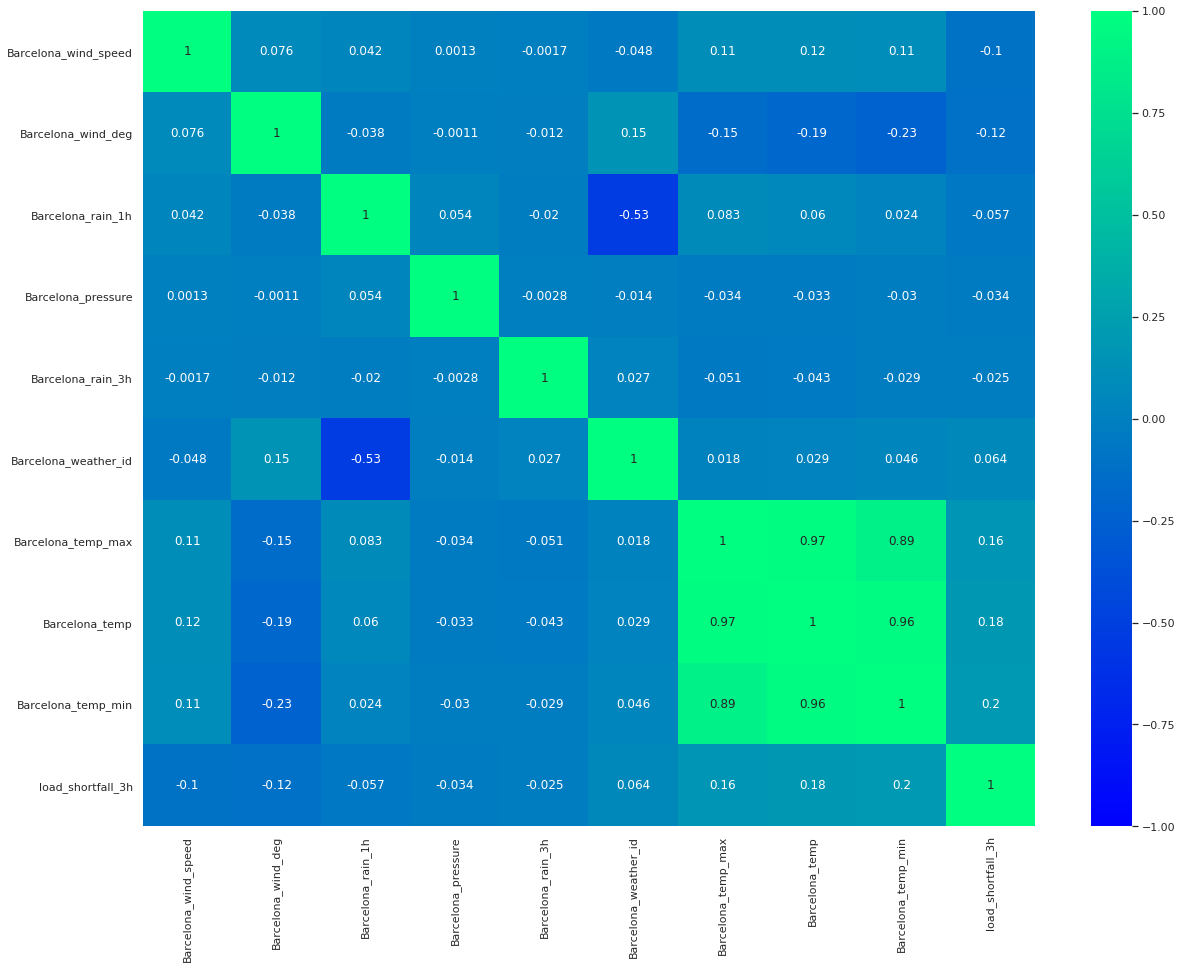

In [658]:
train_corr = scaled_features_df[barcelona_features].corr()
# Plot the matrix
plt.figure(figsize=(20,15))
sns.heatmap(train_corr,annot=True, vmin=-1, vmax=1, cmap='winter')

In [659]:
#Buid the Model

import xgboost
from sklearn.linear_model import LinearRegression, Ridge , Lasso , LogisticRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor

from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn import metrics

#OLS summary
import statsmodels.formula.api as sm

In [660]:
lasso = Lasso(alpha=0.01)
lasso.fit(np.array(X_train) , y_train)

Lasso(alpha=0.01)

In [661]:
# Extract intercept from model
intercept = float(lasso.intercept_)
print(f'Intercept: {intercept}')

Intercept: 10686.806049837714


In [662]:
# Extract coefficient from model
coeff = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficient'])
coeff

,Coefficient
Madrid_wind_speed,-479.762762
Valencia_wind_deg,-58.336221
Bilbao_rain_1h,-144.915459
Valencia_wind_speed,-184.775645
Seville_humidity,-997.575026
Madrid_humidity,19.503842
Bilbao_clouds_all,-162.239971
Bilbao_wind_speed,-127.568939
Seville_clouds_all,7.393642
Bilbao_wind_deg,-199.593236


In [663]:
# Least squares using all predictors
linear_model_all = LinearRegression()
# Ridge using all predictors
ridge_model_all = Ridge()

rand_forest = RandomForestRegressor()
log_regression = LogisticRegression()
tree = DecisionTreeRegressor(random_state=0)


In [664]:
linear_model_all.fit(X_train, y_train)
ridge_model_all.fit(X_train, y_train)
# log_regression.fit(X_train , y_train)
rand_forest_all = rand_forest.fit(X_train , y_train)
tree_all = tree.fit(X_train , y_train)


In [665]:
# Make training set predictions for each model
x_linear_all = linear_model_all.predict(X_train)
x_ridge_all = ridge_model_all.predict(X_train)
x_lasso_all = lasso.predict(X_train)
x_rand_forest_all = rand_forest_all.predict(X_train)
x_tree_all = tree_all.predict(X_train)


In [666]:
# Make test set predictions for each model
y_pred_linear = linear_model_all.predict(X_test)
y_pred_ridge = ridge_model_all.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_rand = rand_forest_all.predict(X_test)
y_pred_tree = tree_all.predict(X_test)

In [667]:
rand_forest_all.score(X_train , y_train)

0.9023280503965135

In [668]:
rand_forest_all.score(X_test , y_test)

0.3071839617825183

In [669]:
#L1 Regularization
lasso_reg = Lasso(alpha=50 , max_iter=100 , tol=0.1)
lasso_reg.fit(X_train , y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [670]:
#L2 Regularixation
ridge_reg = Lasso(alpha=50 , max_iter=100 , tol=0.1)
ridge_reg.fit(X_train , y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [671]:
print(f"L1 Score: Test: {lasso_reg.score(X_test , y_test)}  Train: {lasso_reg.score(X_train , y_train)}")

L1 Score: Test: 0.1316008728841539  Train: 0.1339878880511366


In [672]:
print(f"L2 Score: Test: {ridge_reg.score(X_test , y_test)}  Train: {ridge_reg.score(X_train , y_train)}")

L2 Score: Test: 0.1316008728841539  Train: 0.1339878880511366


In [673]:
from sklearn.metrics import r2_score
print(f'R2 Score: Linear: {r2_score(y_test, y_pred_linear)}')
print(f'R2 Score: Random Forest: {r2_score(y_test, y_pred_rand)}')
print(f'R2 Score: Decision Tree: {r2_score(y_test, y_pred_tree)}')
print(f'R2 Score: Linear: {r2_score(y_test, y_pred_linear)}')

R2 Score: Linear: 0.14803308215026967
R2 Score: Random Forest: 0.3071839617825183
R2 Score: Decision Tree: -0.4480087350190578
R2 Score: Linear: 0.14803308215026967


In [674]:
# Dictionary of results
results_dict = {'Training MSE':
                    {
                        "Least Squares, All": metrics.mean_squared_error(y_train, x_linear_all),
                        "Random Forest": metrics.mean_squared_error(y_train, x_rand_forest_all),
                        "Decision Tree": metrics.mean_squared_error(y_train, x_tree_all),
                        "Ridge": metrics.mean_squared_error(y_train, x_ridge_all),
                        "LASSO": metrics.mean_squared_error(y_train, x_lasso_all)
                    },
                    'Test MSE':
                    {
                        "Least Squares, All": metrics.mean_squared_error(y_test, y_pred_linear),
                        "Random Forest": metrics.mean_squared_error(y_test, y_pred_rand),
                        "Decision Tree": metrics.mean_squared_error(y_test, y_pred_tree),
                        "Ridge": metrics.mean_squared_error(y_test, y_pred_ridge),
                        "LASSO": metrics.mean_squared_error(y_test, y_pred_lasso)
                    }
                }

In [675]:
# Create dataframe from dictionary
mse_err = pd.DataFrame(data=results_dict)
print(np.sqrt(mse_err))

                    Training MSE     Test MSE
Least Squares, All   4782.541182  4876.275722
Random Forest        1620.475353  4397.297561
Decision Tree          76.339162  6357.150300
Ridge                4782.758978  4877.636833
LASSO                4782.797648  4878.760726


In [676]:
#Submissions
import pickle
file_name = 'final_model.pkl'
pickle.dump(rand_forest_all , open(file_name, 'wb'))

In [677]:
final_pred = rand_forest_all.predict(scaled_features_df_test)

In [678]:
final_pred

array([10815.37      , 10117.43666667, 10616.12333333, ...,
       10263.86      , 11471.04666667,  9170.41666667])

In [679]:
daf=pd.DataFrame(final_pred, columns=['load_shortfall_3h'])
daf.isna().sum()

load_shortfall_3h    0
dtype: int64

In [680]:
# output = pd.DataFrame(copy_test['time'])
# submission = pd.concat([output , daf], axis=1)      
# submission.to_csv("submission.csv", index=False)

In [681]:
output = pd.DataFrame(daf)
submission_csv = pd.read_csv('./input/sample_submission_load_shortfall.csv')
submission_csv.drop(['load_shortfall_3h'], axis=1 , inplace=True)

data = pd.concat([submission_csv , output], axis=1)

In [689]:
data.rename(columns={"time": "timex"})
data.insert(0, 'time', copy_test.time.values)
data.drop(['timex'],axis=1, inplace=True)

In [692]:
data.to_csv('sample_submission_load_shortfall.csv' , index=False)

,time,load_shortfall_3h
0,2018-01-01 00:00:00,10815.370000
1,2018-01-01 03:00:00,10117.436667
2,2018-01-01 06:00:00,10616.123333
3,2018-01-01 09:00:00,9406.746667
4,2018-01-01 12:00:00,10887.806667
...,...,...
2915,2018-12-31 09:00:00,9489.116667
2916,2018-12-31 12:00:00,10610.126667
2917,2018-12-31 15:00:00,10263.860000
2918,2018-12-31 18:00:00,11471.046667
